## Spacy Tutorial

Importing Spacy

In [1]:
import spacy

create blank language object and tokenize the text

In [2]:
nlp=spacy.blank("en")

blank language object gives a tokenizer and an empty pipeline.

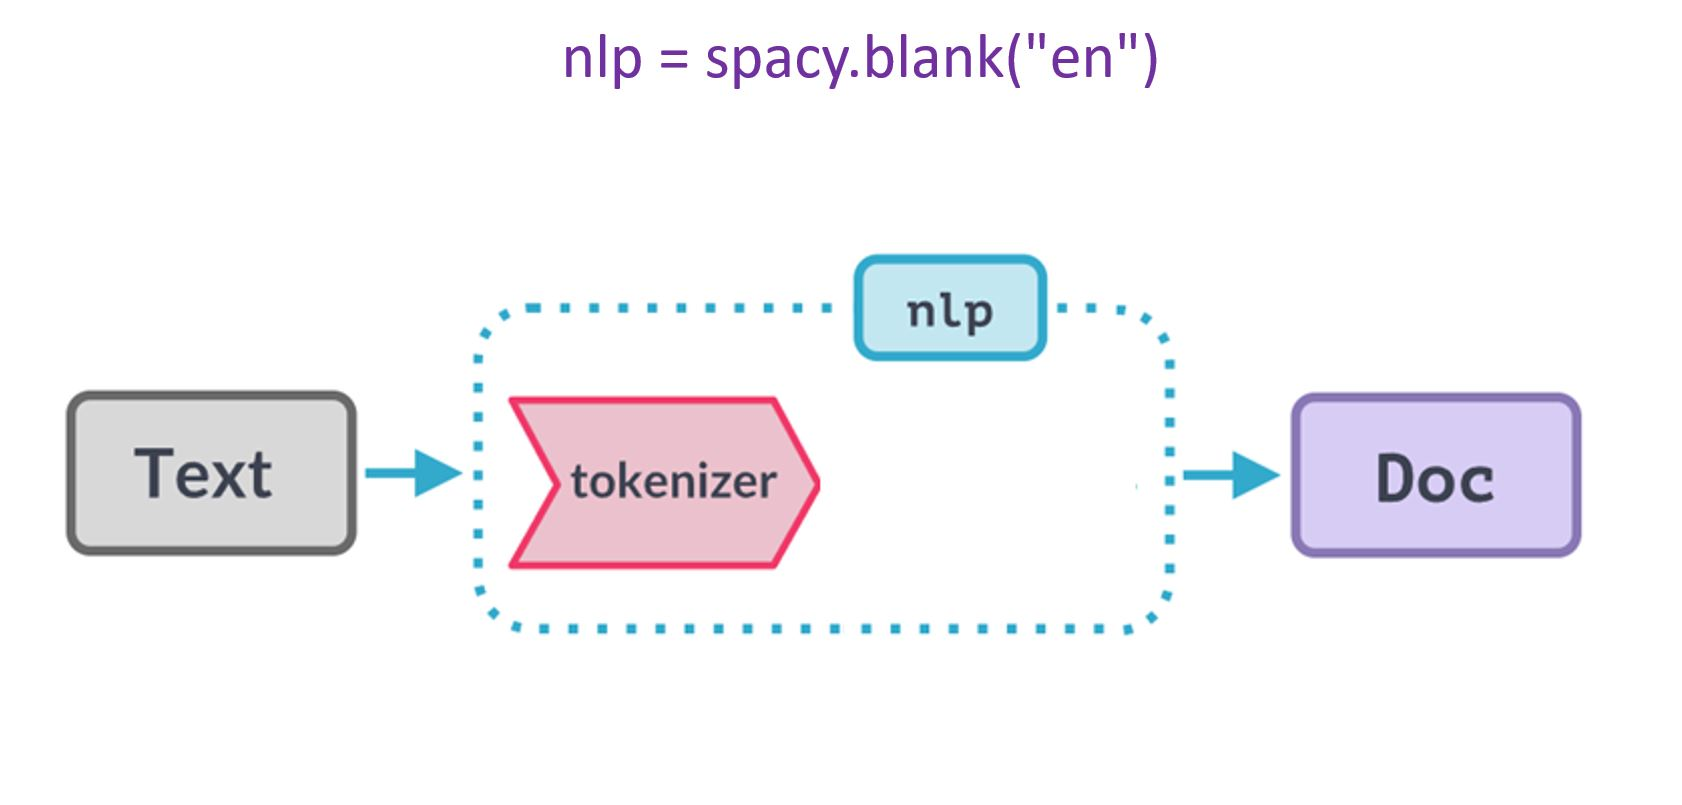

In [3]:
doc=nlp("There are multiple options for you to choose from")
for token in doc:
    print(token,"|",type(token))

There | <class 'spacy.tokens.token.Token'>
are | <class 'spacy.tokens.token.Token'>
multiple | <class 'spacy.tokens.token.Token'>
options | <class 'spacy.tokens.token.Token'>
for | <class 'spacy.tokens.token.Token'>
you | <class 'spacy.tokens.token.Token'>
to | <class 'spacy.tokens.token.Token'>
choose | <class 'spacy.tokens.token.Token'>
from | <class 'spacy.tokens.token.Token'>


Using index to grab tokens

In [4]:
doc[0]

There

In [5]:
token= doc[1]
print(token,"|",type(token))
print(token.text,"|",type(token.text))

are | <class 'spacy.tokens.token.Token'>
are | <class 'str'>


Directory of token

In [6]:
dir(token)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang

In [7]:
type(nlp)

spacy.lang.en.English

In [8]:
type(doc)

spacy.tokens.doc.Doc

In [9]:
type(token)

spacy.tokens.token.Token

In [10]:
nlp.pipe_names

[]

Span object

In [11]:
span=doc[0:4]
span

There are multiple options

In [12]:
type(span)

spacy.tokens.span.Span

Token attributes

In [13]:
doc1 = nlp("Tony gave two $ to Peter.")

In [14]:
token0=doc1[0]
token0

Tony

In [15]:
token0.is_alpha

True

In [16]:
token0.like_num

False

In [17]:
token2 = doc1[2]
token2

two

In [18]:
token2.like_num

True

In [19]:
token3 = doc1[3]
token3

$

In [20]:
token2.is_currency

False

In [21]:
for token in doc1:
    print(token,"==>","index-",token.i,"|","is_alpha-",token.is_alpha,"|",
          "like_num-",token.like_num,"|",
          "is_puntuation-",token.is_punct,"|",
          "is_currency-",token.is_currency)

Tony ==> index- 0 | is_alpha- True | like_num- False | is_puntuation- False | is_currency- False
gave ==> index- 1 | is_alpha- True | like_num- False | is_puntuation- False | is_currency- False
two ==> index- 2 | is_alpha- True | like_num- True | is_puntuation- False | is_currency- False
$ ==> index- 3 | is_alpha- False | like_num- False | is_puntuation- False | is_currency- True
to ==> index- 4 | is_alpha- True | like_num- False | is_puntuation- False | is_currency- False
Peter ==> index- 5 | is_alpha- True | like_num- False | is_puntuation- False | is_currency- False
. ==> index- 6 | is_alpha- False | like_num- False | is_puntuation- True | is_currency- False


Collecting email ids of students from students information sheet

In [22]:
with open("students.txt")as f:
    text= f.readlines()
print(text)

['Dayton high school, 8th grade students information\n', '==================================================\n', '\n', 'Name\tbirth day   \temail\n', '-----\t------------\t------\n', 'Virat   5 June, 1882    virat@kohli.com\n', 'Maria\t12 April, 2001  maria@sharapova.com\n', 'Serena  24 June, 1998   serena@williams.com \n', 'Joe      1 May, 1997    joe@root.com\n', '\n', '\n', '\n']


In [23]:
text = " ".join(text)
text

'Dayton high school, 8th grade students information\n ==================================================\n \n Name\tbirth day   \temail\n -----\t------------\t------\n Virat   5 June, 1882    virat@kohli.com\n Maria\t12 April, 2001  maria@sharapova.com\n Serena  24 June, 1998   serena@williams.com \n Joe      1 May, 1997    joe@root.com\n \n \n \n'

In [24]:
doc2=nlp(text)
emails=[]
for token in doc2:
    if token.like_email:
        emails.append(token.text)
emails

['virat@kohli.com',
 'maria@sharapova.com',
 'serena@williams.com',
 'joe@root.com']

Customizing tokenizer

In [25]:
from spacy.symbols import ORTH

In [26]:
nlp = spacy.blank("en")
doc4 = nlp("gimme double cheese extra large healthy pizza")

In [27]:
tokens=[token.text for token in doc4]
tokens

['gimme', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

In [28]:
nlp.tokenizer.add_special_case("gimme",[{ORTH:"gim"},{ORTH:"me"}])
doc5 = nlp("gimme double cheese extra large healthy pizza")
tokens=[token.text for token in doc5]
tokens

['gim', 'me', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

Sentence Tokenization or Segmentation

In [29]:
for sentence in doc.sents:
    print(sentence)

ValueError: [E030] Sentence boundaries unset. You can add the 'sentencizer' component to the pipeline with: `nlp.add_pipe('sentencizer')`. Alternatively, add the dependency parser or sentence recognizer, or set sentence boundaries by setting `doc[i].is_sent_start`.

In [30]:
nlp.pipeline

[]

In [32]:
nlp.add_pipe("sentencizer")

In [33]:
doc=nlp("Don't worry!,There are multiple options for you to choose from. So better pick the right path.")
for sentence in doc.sents:
    print(sentence)

Don't worry!,There are multiple options for you to choose from.
So better pick the right path.


In [34]:
nlp.pipeline

[('sentencizer', <spacy.pipeline.sentencizer.Sentencizer at 0x2033e939c50>)]

Exercise

(1) Think stats is a free book to study statistics (https://greenteapress.com/thinkstats2/thinkstats2.pdf)

This book has references to many websites from where you can download free datasets. You are an NLP engineer working for some company and you want to collect all dataset websites from this book. To keep exercise simple you are given a paragraph from this book and you want to grab all urls from this paragraph using spacy

In [35]:
text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

# TODO: Write code here
# Hint: token has an attribute that can be used to detect a url

In [36]:
doc=nlp(text)
for token in doc:
    if token.like_url:
        print(token)

http://www.data.gov/
http://www.science
http://data.gov.uk/.
http://www3.norc.org/gss+website/
http://www.europeansocialsurvey.org/.


(2) Extract all money transaction from below sentence along with currency. Output should be,

two $

500 €

In [37]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"

# TODO: Write code here
# Hint: Use token.i for the index of a token and token.is_currency for currency symbol detection

In [45]:
doc=nlp(transactions)
for token in doc:
    if token.like_num and doc[token.i+1].is_currency:
        print(token.text,doc[token.i+1].text)

two $
500 €
